In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).


# ***What?*** 
<200 words

I am planning to analyze the relationship between people’s support and and emotional contagion. I find a dataset of comments and their parent threads on Reddit with upvotes visible, which piques my curiosity about the relationship between comments’ upvotes and their parent threads’ upvotes and what affects this relationship. I decide to investigate it from the perspective of emotional contagion, which means that given the parent texts, or in other words the emotional context, will those comments with similar sentiments gain more support than those sentimentally different? I am going to perform sentimental analyses on both comments and parent comments to see if there is any relationship between these two.

## ***Why?***
<200 words

Kramer, Guillory, & Hancock (2014) empirically proves that there is massive-scale emotional contagion spreading through social media, which means that only by posting texts on the Internet, people’s emotions can be influenced by others’ emotional expressions. Regarding our project, we are trying to delve into this phenomenon and find out its further impact on public support, which actually to some extent reflects people’s degrees of sharing the original emotions and expressing this kind of empathy in the form of upvotes and downvotes. We are not only interested in emotional contagion on social media, but also its manifestations especially public support which is a complex synthesis of public empathy, bandwagon effect, and reasonability of the content. We plan to use this large dataset which avoids the problem of representation errors to investigate the special ways of emotional expressions on social media and delve into their impacts on public support, which is valuable in political and sociological terms.

Kramer, A. D., Guillory, J. E., & Hancock, J. T. (2014). Experimental evidence of massive-scale emotional contagion through social networks. Proceedings of the National Academy of Sciences, 111(24), 8788-8790.

## ***How?***
<400 words

We investigate this topic by comparing the metrics of comments and their parent comments. Each comment is marked by the number of upvotes/downvotes, so it is very convenient for me to explore some similarities or differences in terms of upvotes/downvotes. First, we decide to conduct sentimental analyses on those comments to see if empathy or contagion of emotions play a significant role in people's voting decisions. Second, we will focus on the rational aspect of people's decisions by investigating the topics of those comments and compare them. We are very interested about questions like are people more likely to upvote positive responses to parent comments or on the converse negative responses or dissents are more popular. We intend to delve into this voting mechanism from two aspects and expect more interesting findings.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
<300 words

Considering that this dataset is about comments on Reddit, which endows those users with Internet-use propensity and anonymity, the social actors are undoubtedly these Reddit users and the social game is the discussion on certain topics in the form of Reddit threads. The qualities of Reddit make it just the appropriate platform for us to research this topic, because it is the most visited interest Internet community in which there are a wide variety of users and its capability to manifest both people’s original posts and others’ comments on them enables us to connect comments with their parent threads, which is especially crucial for research on the relationship between people’s emotional expressions. Reddit certainly has its own limitations on representation, as we hope to represent the more general public and the mutability of an active Internet community in terms of its slangs or special language uses like memes can significantly affect the accuracy of sentimental analyses. I think that to enhance the meaning of our research we need to adopt survey methods to provide more evidence on our results or extend our research to other social media platforms to generalize our results.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

In [3]:
neg_df = pandas.read_csv('E:/Content Analysis/comments_negative.csv', chunksize=5000)
for i in neg_df:
    neg_df = i
    break
neg_df

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,cnyhtv3,t1_cnybrh6,t5_2sokh,t3_2tdpp7,Devil's advocate here for sake of argument. W...,-129,-129,dasfeesh,0,t3_2tdpp7,Glad he's going down for assault charges. Shou...,89,89,jetkrosswind,0
4996,c63qmqx,t1_c63qetq,t5_2rfxx,t3_zdzr3,Are you reading with your ears? xD Hes talking...,-129,-129,Aelstar,0,t3_zdzr3,Well if you spend a lot of time in enemy jungl...,84,84,nietie,0
4997,cp6gxvu,t1_cp6gnuv,t5_2y8xf,t3_2y48t6,Gay man here who visits TRP decently often: i...,-129,-129,OhMy8008,0,t3_2y48t6,Found theredpiller.,79,79,mitigateaccomp,0
4998,c6t5eja,t1_c6t3o8t,t5_2qh33,t3_1287dy,PSY,-129,-129,astrograph,0,t3_1287dy,Jackie Chan from The Tuxedo?,258,258,Jaboomaphoo,0


In [4]:
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
Vects = CountVectorizer.fit_transform(neg_df['text'])

In [5]:
TFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(Vects)
TF = TFTransformer.transform(Vects)

In [6]:
list(zip(CountVectorizer.vocabulary_.keys(), TF.data))[:40]

[('na', 0.0411171971435726),
 ('not', 0.0571395920639839),
 ('really', 0.07239753791663264),
 ('just', 0.06316752994384886),
 ('hate', 0.0491951423242403),
 ('islam', 0.044238067664406355),
 ('and', 0.04341795375902343),
 ('everything', 0.0514089335013543),
 ('it', 0.1428577030838878),
 ('stands', 0.08645056314370535),
 ('for', 0.026167886695527675),
 ('don', 0.03863776262200969),
 ('want', 0.20831382903745274),
 ('to', 0.050467425933058654),
 ('share', 0.1665101754943608),
 ('my', 0.09419804912077892),
 ('streets', 0.07019873706467875),
 ('schools', 0.07569513260084686),
 ('stores', 0.08407808113074966),
 ('or', 0.09382016539536894),
 ('any', 0.08050067849221793),
 ('place', 0.08050067849221793),
 ('else', 0.07908096089204174),
 ('that', 0.06614813800468151),
 ('frequent', 0.08950922443291555),
 ('with', 0.13005587132993807),
 ('muslims', 0.08213962218125193),
 ('they', 0.07239753791663264),
 ('are', 0.07391899876807452),
 ('beneath', 0.0646793113628219),
 ('me', 0.08050067849221793),

In [7]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.089, max_features=1000, norm='l2')
#train
TFVects = TFVectorizer.fit_transform(neg_df['text'])
TFVects

<5000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 59427 stored elements in Compressed Sparse Row format>

In [8]:
try:
    print(TFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(TFVectorizer.vocabulary_.keys())[:10]))

vector is missing
The available words are: ['really', 'hate', 'everything', 'want', 'any', 'place', 'else', 'deserve', 'country', 'am'] ...


In [9]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(TFVects.toarray())
reduced_data = pca.transform(TFVects.toarray())

In [10]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


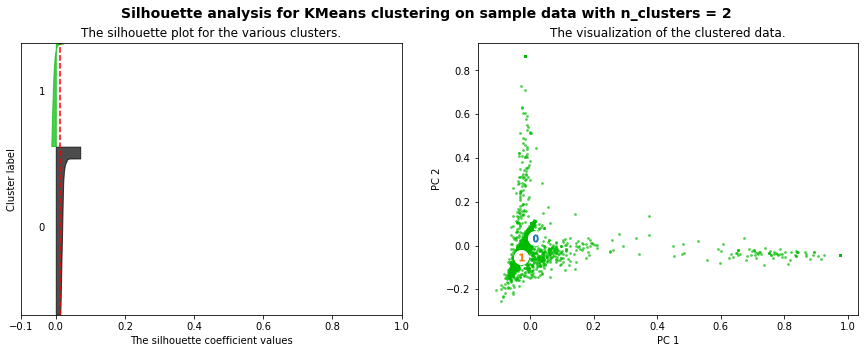

For n_clusters = 2, The average silhouette_score is : 0.011


In [11]:
X = TFVects.toarray()
plotSilhouette(2, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


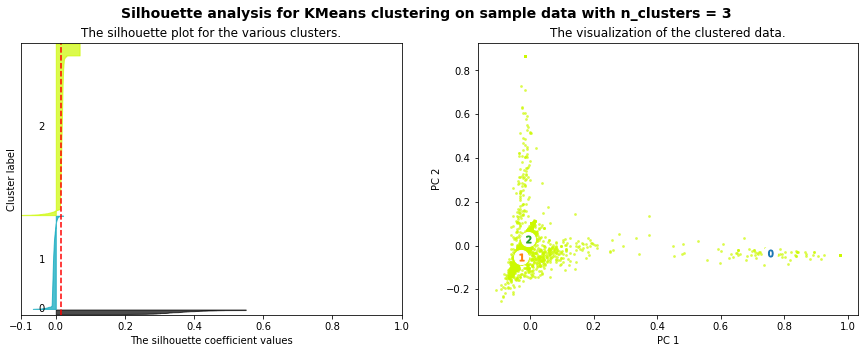

For n_clusters = 3, The average silhouette_score is : 0.016


In [12]:
X = TFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


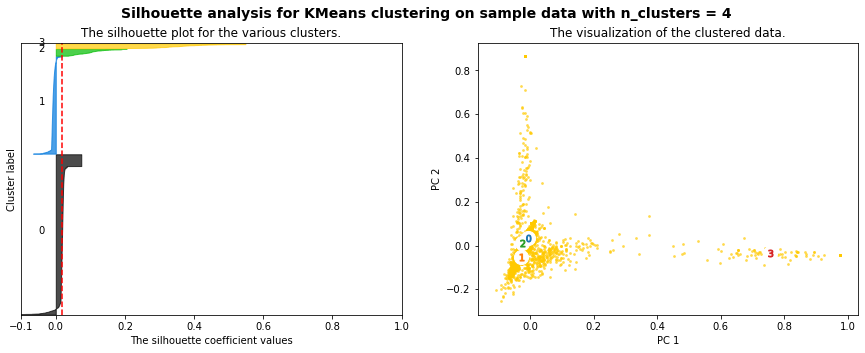

For n_clusters = 4, The average silhouette_score is : 0.018


In [13]:
X = TFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


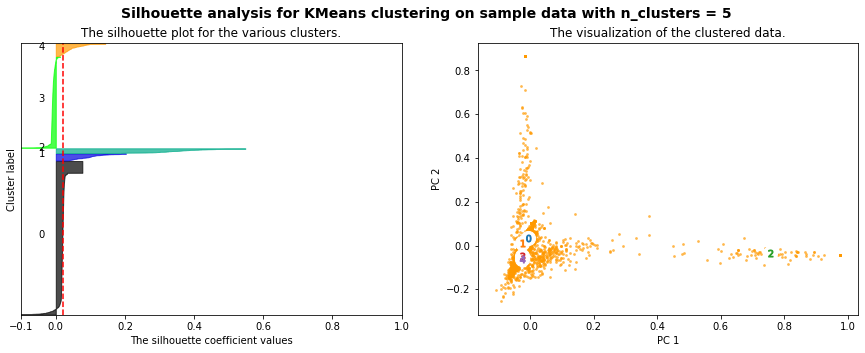

For n_clusters = 5, The average silhouette_score is : 0.020


In [14]:
X = TFVects.toarray()
plotSilhouette(5, X)

In [15]:
km = sklearn.cluster.KMeans(n_clusters=5, init='k-means++')

In [16]:
km.fit(TFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
neg_df['kmeans_predictions'] = km.labels_
neg_df

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality,kmeans_predictions
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0,4
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0,4
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0,4
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,cnyhtv3,t1_cnybrh6,t5_2sokh,t3_2tdpp7,Devil's advocate here for sake of argument. W...,-129,-129,dasfeesh,0,t3_2tdpp7,Glad he's going down for assault charges. Shou...,89,89,jetkrosswind,0,4
4996,c63qmqx,t1_c63qetq,t5_2rfxx,t3_zdzr3,Are you reading with your ears? xD Hes talking...,-129,-129,Aelstar,0,t3_zdzr3,Well if you spend a lot of time in enemy jungl...,84,84,nietie,0,0
4997,cp6gxvu,t1_cp6gnuv,t5_2y8xf,t3_2y48t6,Gay man here who visits TRP decently often: i...,-129,-129,OhMy8008,0,t3_2y48t6,Found theredpiller.,79,79,mitigateaccomp,0,4
4998,c6t5eja,t1_c6t3o8t,t5_2qh33,t3_1287dy,PSY,-129,-129,astrograph,0,t3_1287dy,Jackie Chan from The Tuxedo?,258,258,Jaboomaphoo,0,0


In [18]:
terms = TFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(5):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 lol
 fuck
 comment
 downvote
 she
 why
 karma
 up
 really
 fucking


Cluster 1:
 only
 still
 life
 one
 because
 reddit
 who
 think
 how
 would


Cluster 2:
 knee
 arrow
 took
 used
 then
 too
 use
 think
 le
 make


Cluster 3:
 com
 http
 www
 imgur
 jpg
 comments
 reddit
 has
 subredditdrama
 score


Cluster 4:
 re
 who
 we
 know
 would
 out
 get
 because
 their
 when




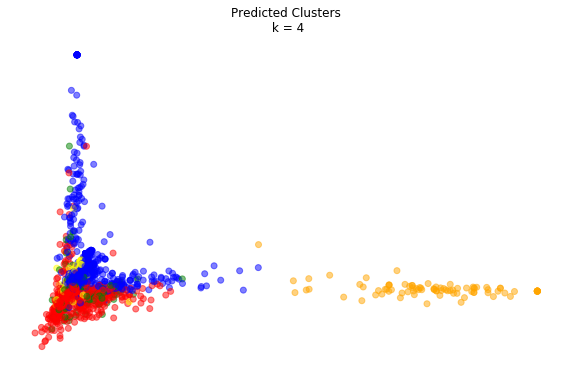

In [19]:
colordict = {
    0: 'blue',
    1: 'green',
    2: 'orange',
    3: 'yellow',
    4: 'red'
}
colors_p = [colordict[l] for l in km.labels_]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 4')
plt.show()

Considering that our dataset is about comments collected from a variety of subreddits on Reddit, which means that they do not share some known common topics. This makes clustering more tricky than usual datasets. I find that as the number of clusters increase, the Silhouette score will correspondingly increase and seems not to have a maximum. This may mean that for this dataset clustering is not a good idea to investigate its structure, but its increasing speed gradually slowes down with the increase of number of clusters, which makes it necessary to involve a tradeoff between the model's interpretation (too many clusters will be uninterpretable) and the preciseness of classification.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

In [20]:
TFVects.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
CoocMat = TFVects * TFVects.T
CoocMat.setdiag(0)

S:\Python-64\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [22]:
linkage_matrix = scipy.cluster.hierarchy.ward(CoocMat.toarray())
linkage_matrix[:10]

S:\Python-64\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[2.600e+01, 4.400e+01, 0.000e+00, 2.000e+00],
       [5.900e+01, 5.000e+03, 0.000e+00, 3.000e+00],
       [8.600e+01, 5.001e+03, 0.000e+00, 4.000e+00],
       [1.170e+02, 5.002e+03, 0.000e+00, 5.000e+00],
       [1.190e+02, 5.003e+03, 0.000e+00, 6.000e+00],
       [1.700e+02, 5.004e+03, 0.000e+00, 7.000e+00],
       [1.790e+02, 5.005e+03, 0.000e+00, 8.000e+00],
       [2.220e+02, 5.006e+03, 0.000e+00, 9.000e+00],
       [2.840e+02, 5.007e+03, 0.000e+00, 1.000e+01],
       [3.100e+02, 5.008e+03, 0.000e+00, 1.100e+01]])

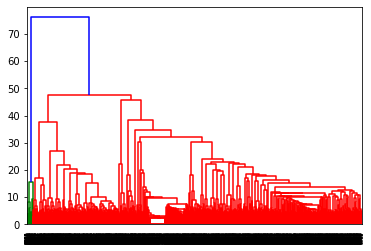

In [23]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

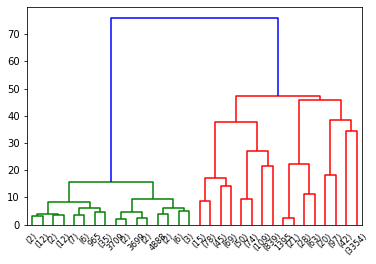

In [24]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

In [33]:
def plotSilhouette_hier(n_clusters, TFVects, distance='euclidean'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    TFVects.todense()
    CoocMat = TFVects * TFVects.T
    CoocMat.setdiag(0)
    X = CoocMat.toarray()
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    if distance == 'euclidean':
        clusterer = sklearn.cluster.AgglomerativeClustering()
    elif distance == 'l2':
        clusterer = sklearn.cluster.AgglomerativeClustering(affinity='l2', linkage='average')
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)


    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for hierarchical clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

S:\Python-64\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
S:\Python-64\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


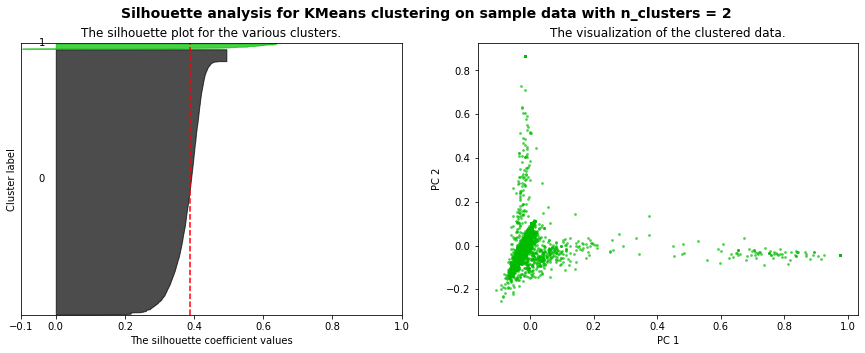

For n_clusters = 2, The average silhouette_score is : 0.387


In [31]:
plotSilhouette_hier(2, TFVects)

This clustering reveals that most of our texts are basically similar, with no significant difference of features. Thus, it is improper for clustering. On the other hand, those comments all share some similar features in term of their content, which are actually conducive to our research considering that they are collected from different subreddits (communities of interest).

S:\Python-64\lib\site-packages\scipy\sparse\_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
S:\Python-64\lib\site-packages\sklearn\cluster\_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


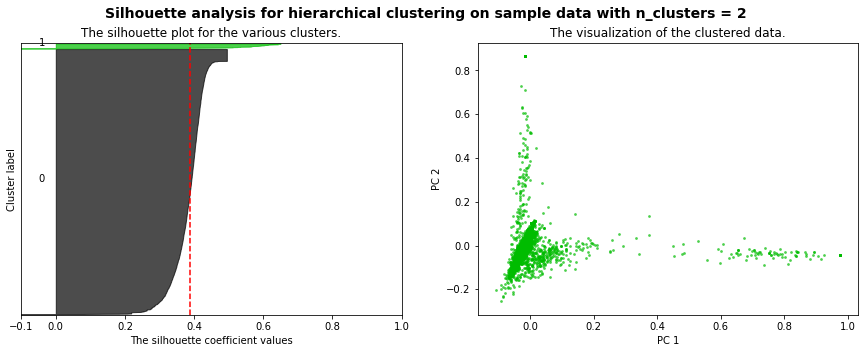

For n_clusters = 2, The average silhouette_score is : 0.388


In [34]:
plotSilhouette_hier(2, TFVects, 'l2')

The hierarchical clustering actually gives more uninterpretable results than normal clustering. Despite its high average silhouette score, hierarchical clustering basically regards the whole dataset as a big cluster without further divisions, which to some extent suggests that those comments share some similarities in terms of their content, which happens to fulfill our research requirement that we wish to research this dataset as a whole without setting subcategories which add to the complexity of interpretation of sentimental analyses.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<span style="color:red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</span> 

In [63]:
neg_df['tokenized_text'] = neg_df['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
neg_df['normalized_tokens'] = neg_df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [64]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]
neg_df['reduced_tokens'] = neg_df['normalized_tokens'].apply(lambda x: dropMissing(x, TFVectorizer.vocabulary_.keys()))

In [65]:
dictionary = gensim.corpora.Dictionary(neg_df['reduced_tokens'])
corpus = [dictionary.doc2bow(text) for text in neg_df['reduced_tokens']]
gensim.corpora.MmCorpus.serialize('comments', corpus)
comments = gensim.corpora.MmCorpus('comments')
commentslda = gensim.models.ldamodel.LdaModel(corpus=comments, id2word=dictionary, num_topics=6, alpha='auto', eta=0.8)

In [68]:
ldaDF = pandas.DataFrame({
        'score' : neg_df['score'],
        'topics' : [commentslda[dictionary.doc2bow(l)] for l in neg_df['reduced_tokens']]
    })

In [69]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(commentslda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(commentslda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF.head()

,score,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,-2946,"[(4, 0.9841327)]",0.000000,0.000000,0.000000,0.000000,0.984133,0.000000
1,-2724,"[(0, 0.018372074), (1, 0.022817466), (2, 0.025...",0.018372,0.022817,0.025588,0.889990,0.024496,0.018736
2,-2132,"[(0, 0.015655037), (1, 0.01944406), (2, 0.0218...",0.015655,0.019444,0.021885,0.018104,0.908943,0.015968
3,-2117,"[(0, 0.028160948), (1, 0.03497477), (2, 0.0393...",0.028161,0.034975,0.039371,0.032553,0.836220,0.028719
4,-1962,"[(0, 0.028161434), (1, 0.034962717), (2, 0.837...",0.028161,0.034963,0.837936,0.032583,0.037641,0.028715


In [71]:
ldaDFV = ldaDF[:10][['topic_%d' % x for x in range(6)]]
ldaDFVisN = ldaDF[:10][['score']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)

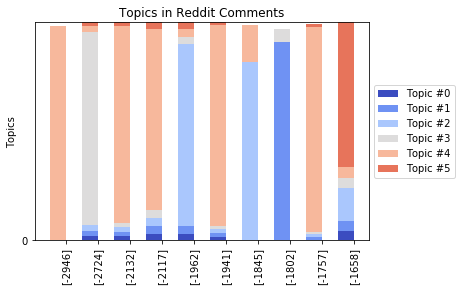

In [72]:
N = 10
ind = np.arange(N)
K = commentslda.num_topics 
ind = np.arange(N) 
width = 0.5 
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  
plt.ylabel('Topics')

plt.title('Topics in Reddit Comments')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

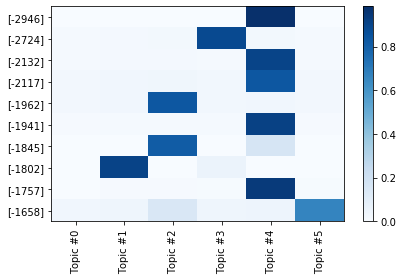

In [73]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [74]:
topicsDict = {}
for topicNum in range(commentslda.num_topics):
    topicWords = [w for w, p in commentslda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,gay,fuck,reddit,woman,downvote,comment
1,thank,know,time,guy,think,gay
2,say,shit,post,man,post,downvote
3,nd,think,think,get,come,take
4,faggot,post,way,know,know,knee
5,year,comment,need,lol,get,arrow
6,old,good,go,right,reddit,user
7,dick,care,karma,want,upvote,goo
8,thing,say,know,think,fuck,da
9,joke,fucking,thing,white,world,thread


<Figure size 432x288 with 0 Axes>

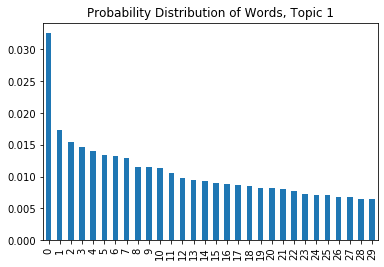

In [75]:
topic1_df = pandas.DataFrame(commentslda.show_topic(1, topn=30))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [77]:
commentslda1 = gensim.models.ldamodel.LdaModel(corpus=comments, id2word=dictionary, num_topics=6, eta = 0.00001)
commentslda2 = gensim.models.ldamodel.LdaModel(corpus=comments, id2word=dictionary, num_topics=6, eta = 0.9)

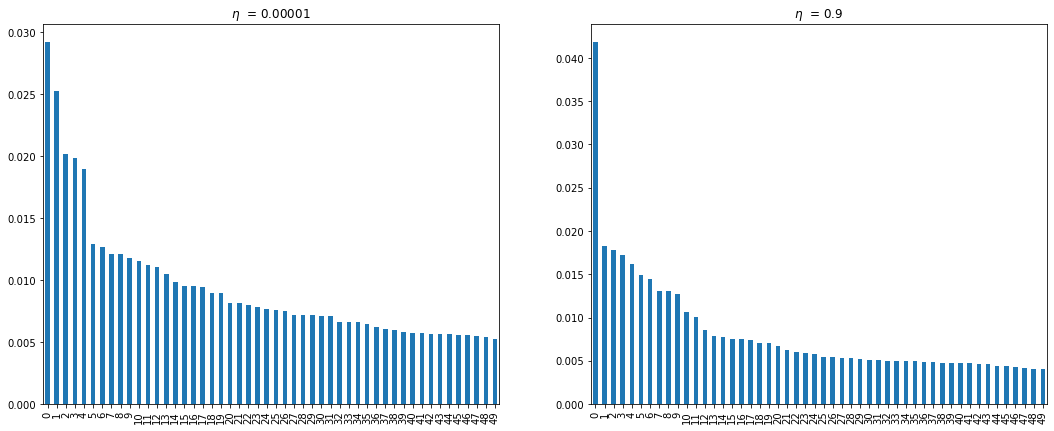

In [78]:
topic11_df = pandas.DataFrame(commentslda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(commentslda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

According to the above analyese, the short lengths of comments undoubtedly set barriers for interpretation through LDA models, which results from the fact that short texts lead to only a few tokens, whose number is even lower by reducing the tokens, and short texts limit the usage of words, which are mostly restricted to some daily words and dirty language given that those comments get a lot of downvotes. Thus it may be improper to automatically cluster them by topics because those topics generated are almost uninterpretable and do not have some clear patterns that are worthy of research.



## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that use topic models and networks, or dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?)

In [36]:
corpora_address = "E:/Content Analysis/SOAP"
soap_texts = lucem_illud_2020.loadDavies(corpora_address, num_files=2000)

text_0-tez.zip
text_1-teh.zip
text_2-wts.zip
text_3-pem.zip
text_4-jfy.zip
text_5-rag.zip
text_6-egn.zip
text_7-jss.zip
text_8-sbo.zip
text_9-jtw.zip


In [42]:
import zipfile
import pandas as pd

In [38]:
zfile = zipfile.ZipFile(corpora_address + "/soap_sources.zip")
source = []

In [39]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [40]:
soap_dict = {}
for soap in source[3:]:
    try:
        textID, year, show, url = soap.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    if show.strip() not in soap_dict:
        soap_dict[show.strip()] = []
    if show.strip() in soap_dict:
        try:
            soap_dict[show.strip()].append(soap_texts[textID.strip()])
        except KeyError:
            continue

In [43]:
soap_df = pd.DataFrame(columns=["Soap Name", "Tokenized Texts"])

In [44]:
i = 0
for soap in soap_dict:
    # since there were multiple lists
    print(soap)
    full_script = []
    for part in soap_dict[soap]:
        full_script = full_script + part
    soap_df.loc[i] = [soap, full_script]
    i += 1

All My Childen
As the World Turns
Bold and Beautiful
Days of Our Lives
General Hospital
Guiding Light
One Life to Live
Passions
Port Charles
Young and Restless


In [45]:
dool = soap_df['Tokenized Texts'][1]

In [46]:
characters = {}
for token in dool:
    if token[0] == '@':
        # all characters or actions start with @, so we add that to character
        if token[2:] not in characters:
            characters[token[2:]] = 0
        if token[2:] in characters:
            characters[token[2:]] += 1

In [48]:
import networkx as nx

In [49]:
actor_network = nx.Graph()
for character in characters:
    if characters[character] > 2000:
        actor_network.add_node(character, lines_spoken= characters[character], words=[])

In [51]:
i = 0
all_texts = []
for token in dool:
    i += 1
    if i > len(dool):
        break
    if token[0] == "@":
        if token[2:] in actor_network.nodes():
            j = i
            for token_ in dool[i:]:
                if token_[0] == "@":
                    # if both the characters exist in the graph, add a weight
                    if token_[2:] != token[2:] and token_[2:] in actor_network.nodes():
                        if (token[2:], token_[2:]) not in actor_network.edges():
                            actor_network.add_edge(token[2:], token_[2:], weight=0)
                        if (token[2:], token_[2:]) in actor_network.edges():
                            actor_network.edges[(token[2:], token_[2:])]['weight'] += 1
                    break
                j += 1
            # adding characters sentences
            actor_network.nodes[token[2:]]['words'].append(dool[i:j])
            all_texts.append(lucem_illud_2020.normalizeTokens(dool[i:j]))

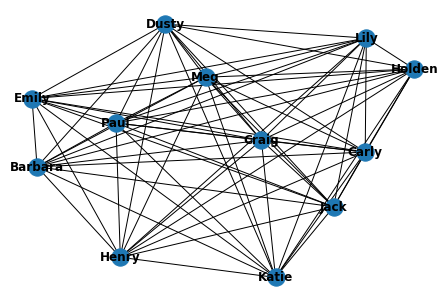

In [52]:
nx.draw(actor_network, with_labels=True, font_weight='bold')

In [53]:
all_texts[0:10]

[['simon'],
 ['dream'],
 ['oh', 'simon', 'm', 'sorry', 'm', 'sorry'],
 ['foot', 'okay'],
 ['find'],
 ['find',
  'record',
  'payment',
  'past',
  'past',
  'past',
  'past',
  'carly',
  'early',
  'sorry',
  'carly',
  'go',
  'kitchen',
  'bring',
  'coffee',
  'pot',
  'hey',
  'drink'],
 ['yeah', 'sorry'],
 ['okay',
  'sleep',
  'week',
  'hey',
  'go',
  'okay',
  'jack',
  'use',
  'carly',
  'tenney',
  'system'],
 ['rob', 'bank'],
 ['plan', 'b', 'plan', 'throw', 'bill', 'air', 'stay', 'deserve', 'pay']]

In [60]:
dictionary = gensim.corpora.Dictionary(all_texts)
corpus = [dictionary.doc2bow(text) for text in all_texts]
gensim.corpora.MmCorpus.serialize('dool.mm', corpus)
doolcorpus = gensim.corpora.MmCorpus('dool.mm')
doollda = gensim.models.ldamodel.LdaModel(corpus=doolcorpus, id2word=dictionary, 
                                          num_topics=6, alpha='auto', eta='auto', 
                                          iterations=400, eval_every = None, passes=4)
doollda.show_topics()

[(0,
  '0.134*"m" + 0.053*"go" + 0.049*"oh" + 0.044*"need" + 0.025*"sorry" + 0.023*"help" + 0.019*"right" + 0.017*"ask" + 0.016*"fine" + 0.015*"meg"'),
 (1,
  '0.067*"thank" + 0.042*"stop" + 0.027*"great" + 0.023*"mom" + 0.019*"hi" + 0.017*"listen" + 0.016*"miss" + 0.015*"faith" + 0.014*"true" + 0.014*"honey"'),
 (2,
  '0.125*"want" + 0.108*"okay" + 0.071*"na" + 0.071*"gon" + 0.022*"henry" + 0.022*"care" + 0.017*"stay" + 0.017*"kid" + 0.012*"promise" + 0.011*"worry"'),
 (3,
  '0.074*"know" + 0.047*"think" + 0.026*"like" + 0.025*"come" + 0.024*"get" + 0.022*"tell" + 0.020*"good" + 0.020*"ve" + 0.019*"mean" + 0.018*"thing"'),
 (4,
  '0.054*"love" + 0.033*"hey" + 0.025*"home" + 0.023*"jack" + 0.022*"long" + 0.020*"take" + 0.018*"wo" + 0.017*"marry" + 0.016*"bring" + 0.016*"change"'),
 (5,
  '0.097*"yeah" + 0.086*"right" + 0.044*"yes" + 0.033*"let" + 0.028*"lily" + 0.027*"holden" + 0.026*"uh" + 0.024*"damian" + 0.022*"sure" + 0.016*"hear"')]

In [61]:
for actor in actor_network.nodes():
    actor_all_words = []
    for sent in actor_network.nodes[actor]['words']:
        for word in sent:
            actor_all_words += word
    actor_network.nodes[actor]['topic_distribution'] = doollda[dictionary.doc2bow(lucem_illud_2020.normalizeTokens(actor_all_words))]
for actor in actor_network.nodes():
    print(actor_network.nodes[actor]['topic_distribution'])

[(0, 0.42347106), (1, 0.14497864), (2, 0.16436262), (4, 0.1973443), (5, 0.06982303)]
[(0, 0.4210433), (1, 0.14835936), (2, 0.16339606), (4, 0.19583325), (5, 0.07135436)]
[(0, 0.417634), (1, 0.14925668), (2, 0.16454901), (4, 0.19615607), (5, 0.07239211)]
[(0, 0.42812026), (1, 0.14145015), (2, 0.16585906), (4, 0.19766545), (5, 0.066876166)]
[(0, 0.43048263), (1, 0.1399151), (2, 0.15761432), (4, 0.19968532), (5, 0.072288334)]
[(0, 0.42195848), (1, 0.14635895), (2, 0.16114338), (4, 0.20293832), (5, 0.06756923)]
[(0, 0.42722252), (1, 0.143831), (2, 0.16149734), (4, 0.19795555), (5, 0.06948185)]
[(0, 0.43467605), (1, 0.13777472), (2, 0.15606898), (4, 0.20066763), (5, 0.07079543)]
[(0, 0.42078462), (1, 0.14800766), (2, 0.1635708), (4, 0.19736871), (5, 0.07024819)]
[(0, 0.41769427), (1, 0.15471278), (2, 0.16345862), (4, 0.19644232), (5, 0.0676691)]
[(0, 0.43059203), (1, 0.1405176), (2, 0.16158763), (4, 0.19971721), (5, 0.06756294)]
[(0, 0.42598206), (1, 0.1463012), (2, 0.15886438), (4, 0.19708

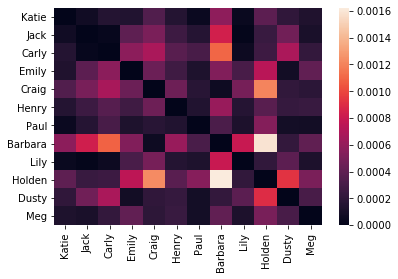

In [62]:
from gensim.matutils import kullback_leibler
def convert_to_prob(bow):
    ps = []
    for topic_no, topic_prob in bow:
        ps.append(topic_prob)
    return ps

L = []
for actor_1 in actor_network.nodes():
    p = actor_network.nodes[actor_1]['topic_distribution'] 
    p = convert_to_prob(p)
    l = []
    for actor_2 in actor_network.nodes():
        q = actor_network.nodes[actor_2]['topic_distribution'] 
        q = convert_to_prob(q)
        l.append(kullback_leibler(p, q))
    L.append(l)
M = np.array(L)

fig = plt.figure()
div = pandas.DataFrame(M, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

Considering that our dataset is about comments on Reddit, which are short and randomly collected from different subreddits, resulting in the difficulty of finding common topics among them. Hence I use the soap dataset instead to extend the analyses on another soap As the World Turns. According to the above analyses, I found it very hard to generate obvious distinctions between each actor's topic distribution after I tried a variety of parameter changes. Despite their insignificant statistical differences on topics, the heatmap shows that actually they have very different patterns of speaking in terms of topics. We can see that most of the spots are black, which suggests that the similarity between those actors is low, except between Barbara and Holden. The two characters are both regular characters, albeit with the relatively low degree of interaction. Their occupations are also very different with Barbara a businesswoman and Holden a former stable boy. But they do appear to be determinant and even stubborn in their character traits, which may influence their habits of language use and thus lead to the similarity on topics. 